In [16]:

import warnings
from qiskit import  Aer, transpiler
from qiskit.providers.fake_provider import *


def circuit_transpiled(n, backend):
    """
    Transpile a quantum circuit for a specific backend.

    Parameters:
    - n (int): The number of qubits in the circuit.
    - backend (Backend): The backend for which to transpile the circuit.

    Returns:
    - printed (None): Printed information about basis gates and circuit depth.
    - a_tran (Matplotlib object): The drawing of the transpiled circuit.
    """
    
    
    a = TwoLocal(n, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3, insert_barriers=True)
    
    # Transpile the circuit into the basis gates
    config = backend.configuration()
    basis_gates = config.basis_gates
    transpiled_circ = transpile(a, backend=backend)
    
    printed = print('Basis Gates:', basis_gates, '\n', 'Original depth:', a.depth(), 'Decomposed Depth:', transpiled_circ.depth())
    a_tran = transpiled_circ.draw(output='mpl')
    
    return a_tran, printed
    
    


ModuleNotFoundError: No module named 'utils'

/Users/ethanelliotrajkumar/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


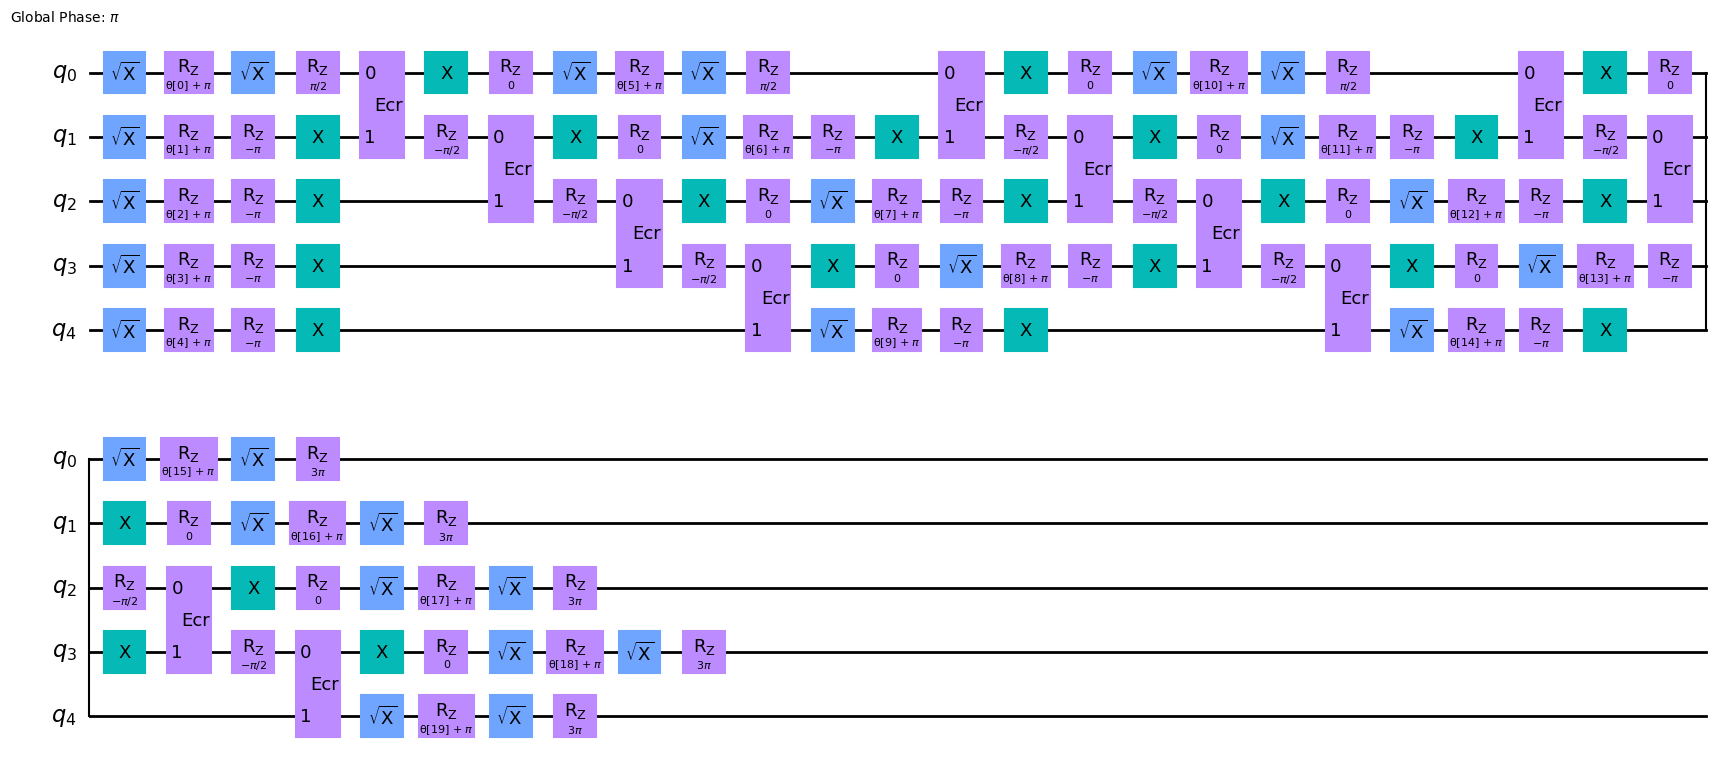

In [20]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile
import numpy as np

from qiskit import QuantumCircuit, Aer, execute, transpiler
from qiskit.circuit import Parameter
import numpy as np

# Define the parameters
X = [Parameter(f'X[{i}]') for i in range(9)]



# # Initialize the circuit
# qc = QuantumCircuit(4)

# # Add √X gates (Hadamard gates for simplicity) to each qubit
# for i in range(4):
#     qc.h(i)

# # Add Rz gates with parameters
# qc.rz(X[0], 0)
# qc.rz(X[1], 1)
# qc.rz(X[2], 2)
# qc.rz(X[3], 3)

# # Additional Rz and √X gates according to the diagram
# qc.rz(X[4], 2)
# qc.h(2)
# qc.rz(X[5], 3)
# qc.h(3)

# # Assuming Ecr represents some entanglement gate, replace with actual operation
# # For illustration, using CNOT as a placeholder
# qc.cx(3, 2)  # Replace with actual Ecr operation
# qc.cx(2, 1)
# qc.cx(1, 0)

# # U3 gate on qubit 0
# qc.u(np.pi, -np.pi, 0, 0)

# # Final Rz gates
# qc.rz(X[6], 2)
# qc.rz(X[7], 1)
# qc.rz(X[8], 2)


# qc = transpile(qc, basis_gates=['ecr', 'sx', 'x', 'rz', 'id'])

from qiskit.circuit.library import TwoLocal 


qc = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3).decompose()
qc = transpile(qc, basis_gates=['ecr', 'sx', 'x', 'rz', 'id'])
# Display the circuit
qc.draw('mpl')



In [ ]:
# Transpile the circuit into the basis gates
n = 4
b1= FakeMelbourne()
c1, p1 = circuit_transpiled(n,b1)
c1

NameError: name 'FakeMelbourne' is not defined

In [ ]:
# Transpile the circuit into the basis gates
n = 4
b2= FakeLima()
c2, p2 = circuit_transpiled(n,b2)
c2

NameError: name 'FakeLima' is not defined

In [ ]:
# Transpile the circuit into the basis gates
n = 4
b2= FakeLima()
c2, p2 = circuit_transpiled(n,b2)
c2

NameError: name 'FakeLima' is not defined

In [ ]:
import numpy as np
from scipy.linalg import expm

# Define Pauli X matrix
X = np.array([[0, 1], [1, 0]])

# Define Rz rotation matrix function
def Rz(theta):
    return expm(-1j * theta / 2 * np.array([[1, 0], [0, -1]]))

# Define the √X gate as the square root of Pauli X matrix
sqrt_X = expm(-1j * np.pi / 4 * X)

# Define the theta parameter symbolically
theta = np.pi

# Calculate the product of the gates as provided in the original circuit
# Note: In the matrix product, the order of multiplication is reversed because the first gate to be applied is on the right
original_circuit = np.dot(Rz(3*np.pi), np.dot(sqrt_X, np.dot(Rz(theta + np.pi), sqrt_X)))

# Calculate the proposed simplified decomposition
# Here we're assuming the X in the decomposition is actually sqrt_X (as a full X wouldn't be a simplification of the √X gates)
proposed_simplification = np.dot(Rz(3*np.pi), np.dot(X, Rz(theta +  np.pi)))

# Check if the matrices are equal up to a global phase
# We do this by checking if the determinant of the product of one and the inverse of the other is a real number
# (since a global phase would only affect the phase of the determinant, not its magnitude)
are_equal_up_to_global_phase = np.isclose(
    np.linalg.det(np.dot(original_circuit, np.linalg.inv(proposed_simplification))).imag, 0)

original_circuit, proposed_simplification, are_equal_up_to_global_phase


(array([[ 1.2246468e-16-1.99673462e-16j, -1.0000000e+00-1.83697020e-16j],
        [ 1.0000000e+00-1.83697020e-16j,  1.2246468e-16+1.79380389e-16j]]),
 array([[0.000000e+00+0.j, 6.123234e-17-1.j],
        [6.123234e-17+1.j, 0.000000e+00+0.j]]),
 True)

In [ ]:
n = 4 
b0 = Aer.get_backend('qasm_simulator')
c0, p0 = circuit_transpiled(n, b0)
c0

NameError: name 'Aer' is not defined

In [ ]:
# Let's re-import the necessary libraries along with the code for decomposition.
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize

# Define Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Define the Rz rotation matrix function
def Rz(theta):
    return expm(-1j * theta / 2 * Z)

# Define the Ry rotation matrix function
def Ry(theta):
    return expm(-1j * theta / 2 * Y)

# Define the SX (Sqrt-X) gate
SX_gate = expm(-1j * np.pi / 4 * X)

# Decompose Ry gate into the hardware-efficient basis consisting of Rz and SX gates
def decompose_Ry(theta):
    # Objective function to minimize (fidelity between the target Ry and the decomposed gate sequence)
    def objective(angles):
        phi_1, phi_2 = angles
        decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))
        target_gate = Ry(theta)
        # Fidelity calculation
        fidelity = np.abs(np.trace(np.dot(decomposed_gate_sequence, target_gate.conj().T)))
        return 1 - fidelity  # We want to minimize 1 - fidelity
    
    # Initial guess for angles phi_1 and phi_2
    initial_guess = [0, 0]
    
    # Run the optimization to find the angles
    result = minimize(objective, initial_guess, method='Nelder-Mead')
    
    # Extract the optimized angles
    phi_1, phi_2 = result.x
    
    # Construct the decomposed gate sequence with the optimized angles
    decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))
    
    return phi_1, phi_2, decomposed_gate_sequence, result.success

# Decompose the Ry gate for a common angle, theta = pi/2 (90 degrees)
theta = np.pi

decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))



NameError: name 'phi_1' is not defined

In [ ]:
a = TwoLocal(n, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3, insert_barriers=True)

In [ ]:
a   = transpile(a, basis_gates=['ecr', 'rz', 'x', 'sx', 'id'])
a = transpile(a, optimization_level=3)

NameError: name 'transpile' is not defined

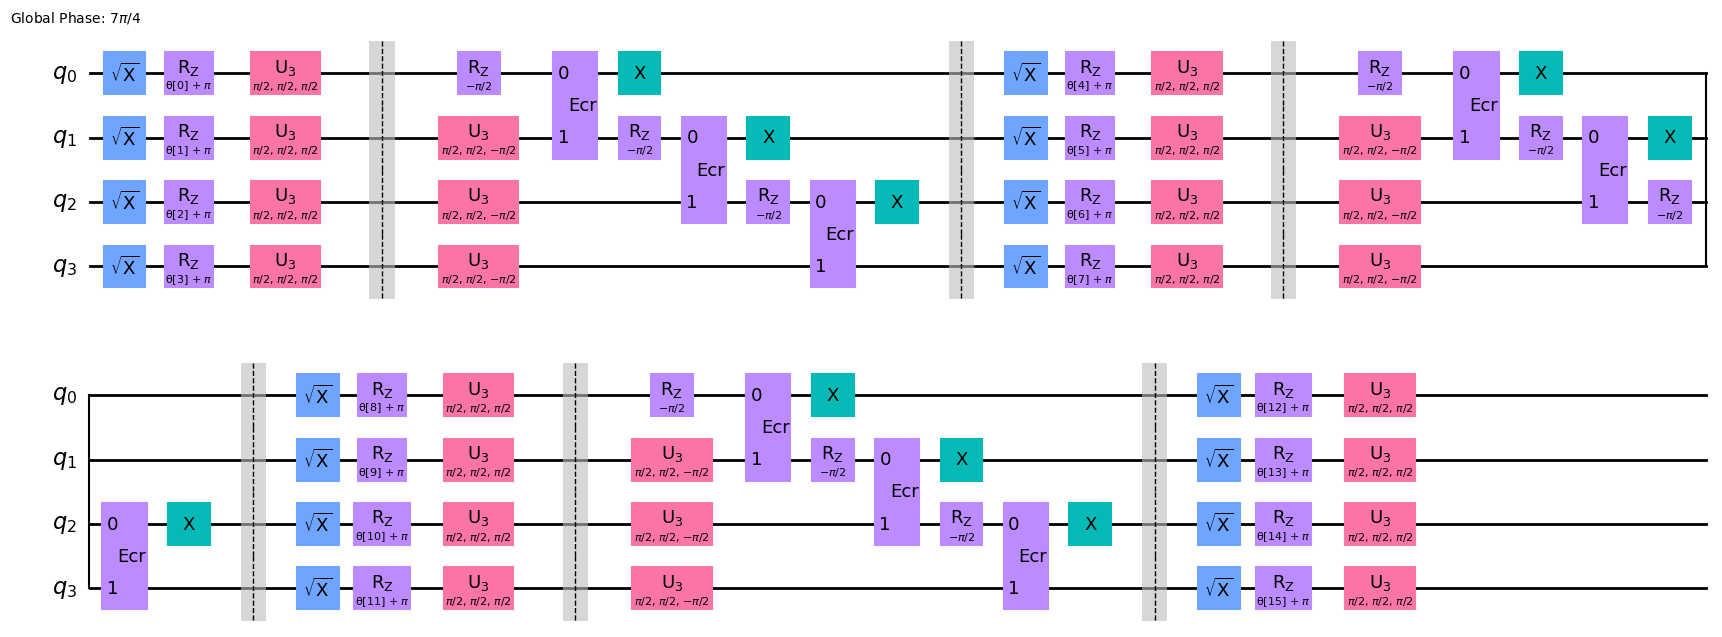

In [ ]:
a.draw(output='mpl')